<H3>PRI 2023/24: first project delivery</H3>

**GROUP 12**
- João Oliveira, ist98950
- Inês Alves, ist99084


<H3>Part I: demo of facilities</H3>

A) **Indexing** (preprocessing and indexing options)

In [3]:
import projeto
d = "001.txt"
D = "text"
p = 8

projeto.indexing(D)

('index', 0.0712)

B) **Summarization**

*B.1 Summarization solution: results for a given document*

In [4]:
projeto.summarization("t1.txt", p, None, None, "text", "tfidf")


[(0, 2.0330150061822962),
 (2, 2.0330150061822962),
 (5, 2.0330150061822962),
 (6, 2.0330150061822962),
 (7, 2.0330150061822962),
 (9, 2.0330150061822962),
 (10, 2.0330150061822962),
 (11, 2.0330150061822962)]

*B.2 IR models (TF-IDF, BM25 and EBRT)*

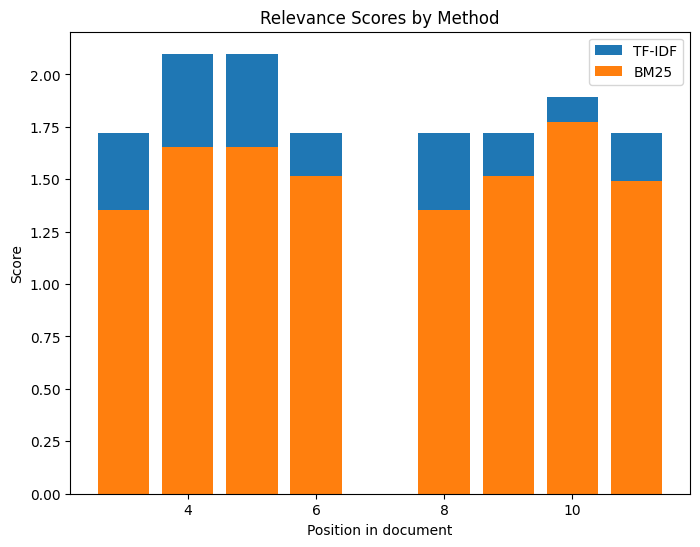

In [ ]:
import matplotlib.pyplot as plt
tfidf = projeto.summarization(d, p, None, None, D, "tfidf")
bm25 = projeto.summarization(d, p, None, None, D, "bm25")

methods = ["TF-IDF", "BM25"]
scores = [tfidf, bm25]

plt.figure(figsize=(8, 6))
for method, score in zip(methods, scores):
    docnums, relevance_scores = zip(*score)
    plt.bar(docnums, relevance_scores, label=method)

plt.xlabel('Position in document')
plt.ylabel('Score')
plt.title('Relevance Scores by Method')
plt.legend()
plt.show()

*B.3 Reciprocal rank funsion*

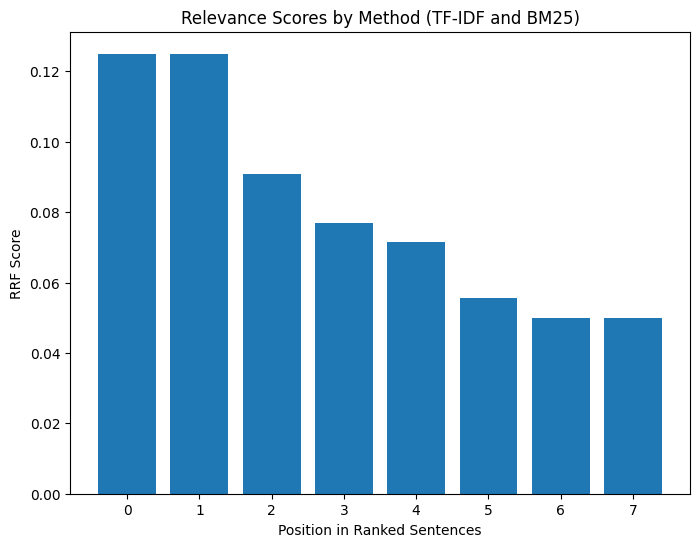

In [ ]:
from collections import defaultdict
def rrf_rank_sentences(s1, s2):
    combined_ranks = defaultdict(int)
    for rank, sentence in enumerate(s1):
        combined_ranks[sentence] += rank + 1
    for rank, sentence in enumerate(s2):
        combined_ranks[sentence] += rank + 1

    rrf_scores = {sentence: 1 / (5 + rank) for sentence, rank in combined_ranks.items()}
    ranked_sentences = sorted(rrf_scores.items(), key=lambda x: x[1], reverse=True)
    return ranked_sentences

s_bm25 = [score for (pos, score) in bm25]
s_tfidf = [score for (pos, score) in tfidf]
ranked = rrf_rank_sentences(s_tfidf, s_bm25)
positions, scores = zip(*ranked)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores)
plt.xlabel('Position in Ranked Sentences')
plt.ylabel('RRF Score')
plt.title('Relevance Scores by Method (TF-IDF and BM25)')
plt.show()

*B.4 Maximal Marginal Relevance*

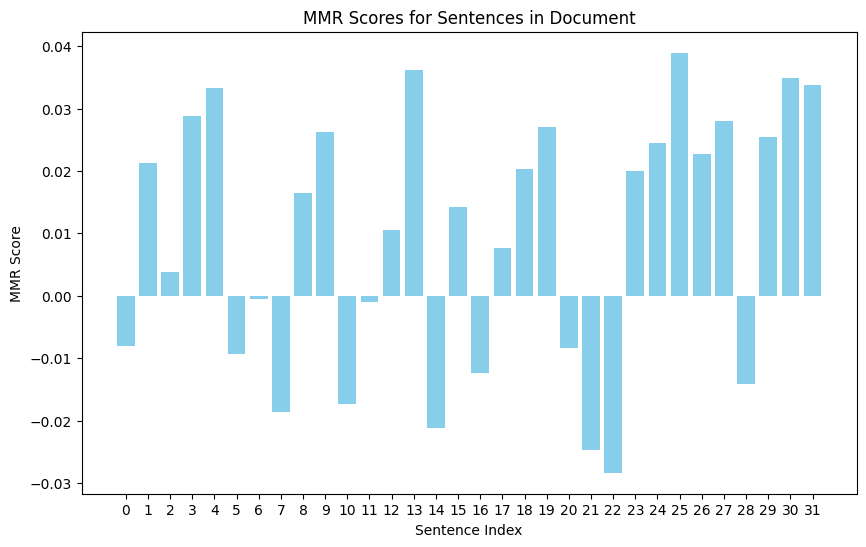

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk

def calculate_mmr_score(sentence, summary, document):
    vectorizer = CountVectorizer()
    vectorizer.fit([sentence, document] + summary)
    sentence_vec = vectorizer.transform([sentence]).toarray()
    summary_vec = vectorizer.transform(summary).toarray()
    document_vec = vectorizer.transform([document]).toarray()

    sim_sentence_document = cosine_similarity(sentence_vec, document_vec)
    sim_sentence_summary = cosine_similarity(sentence_vec, summary_vec)
    mmr_score = (1 - 0.5) * sim_sentence_document - 0.5 * np.sum(sim_sentence_summary)
    return mmr_score[0][0] 

doc = open("t1.txt", "r")
txt = doc.read()
doc2 = open("s1.txt", "r")
sum = doc2.read()
mmr_scores = []
sentences = nltk.sent_tokenize(txt)
for sentence in sentences:
    mmr_scores.append(calculate_mmr_score(sentence, nltk.sent_tokenize(sum), txt))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(mmr_scores)), mmr_scores, color='skyblue')
plt.xlabel('Sentence Index')
plt.ylabel('MMR Score')
plt.title('MMR Scores for Sentences in Document')
plt.xticks(np.arange(len(mmr_scores)))
plt.show()

The negative values for MMR scores indicate that those sentences are more similar to the summary than to the document, which makes them redundant.
Other values of lambda(smaller) would produce more pleasant and positive values, and other similarity metrics such as the one choosen previously (TF-IDF) could also help to reach higher values.

C) **Keyword extraction**

In [ ]:
p_suggested = projeto.keyword_extraction("t1.txt", p, "text", "tfidf")
p_smaller = projeto.keyword_extraction("t1.txt", 3, "text", "tfidf")
p_higher = projeto.keyword_extraction("t1.txt", 20, "text", "tfidf")

D) **Evaluation**

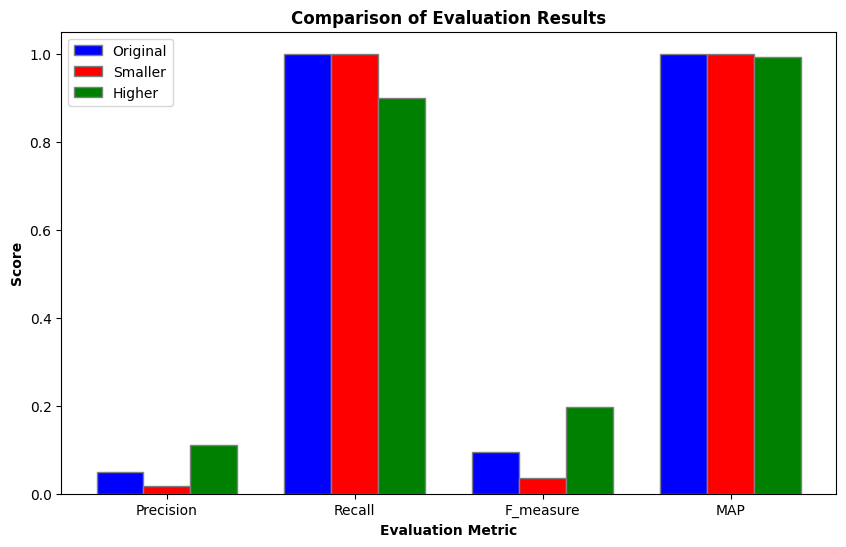

In [ ]:
evaluation_results = projeto.evaluation("s1.txt", p_suggested, None)
res_smaller = projeto.evaluation("s1.txt", p_smaller, None)
res_higher = projeto.evaluation("s1.txt", p_higher, None)

# Plotting
# Extracting metric names and scores
metrics = list(evaluation_results.keys())
scores = list(evaluation_results.values())
score_smaller = list(res_smaller.values())
score_higher = list(res_higher.values())

bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, scores, color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, score_smaller, color='red', width=bar_width, edgecolor='grey', label='Smaller')
plt.bar(r3, score_higher, color='green', width=bar_width, edgecolor='grey', label='Higher')
plt.xlabel('Evaluation Metric', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Comparison of Evaluation Results', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)
plt.legend()
plt.show()

<H3>END</H3>